<a href="https://colab.research.google.com/github/JoanManel/funcions_labs_UB/blob/main/exemples_f_labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemple d'anàlisi de dades experimentals

Aquest notebook mostra com utilitzar la llibreria `funcions_labs.py` per:

- expressar magnituds amb incerteses amb el nombre correcte de xifres significatives...
- Fer gràfiques tipus *y*(*x*) amb incerteses i possibilitat de posar escales logarítmiques
- Fer ajustos lineals, exponencials, potencials i qualssevol altre dependència
- Obtenir els paràmetres de l'ajust amb incerteses, coeficient de correlació, RMSE (Root Mean Square Error, Error quadràtic mitjà arrelat, en català) i ji quadrat reduït,
### Interpretació del valor del χ² reduït

- Si \( \chi^2_\nu \approx 1 \): ajust correcte  
- Si \( \chi^2_\nu \gg 1 \): mal ajust  
- Si \( \chi^2_\nu \ll 1 \): incerteses probablement massa grans

In [ ]:
import numpy as np
from funcions_labs import *

In [ ]:
# Per representar correctament un nombre amb incertesa opdem fer servir la funcio format_resultat(valor, incertesa)
# Expressa la incertesa amb una xifra significativa arrodonint-la (a no ser que sigui un 1)
#expressa el resultat de manera que la mantisa (si cal) sigui un multiple de 3 (per motius estètics)
#llavors posa el valor amb el mateix nombre de decimals i mantisa que la incertesa
#La funció dM(text), serveix per mostrar correctament el LaTeX fent display(Math(text))
display(format_resultat(234.234,1.275))
dM(format_resultat(234.234,1.275))
dM(format_resultat(434.3445e11,137e8))

'234.2 \\pm 1.3'

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
# Aquí tenim el llistat de tots els models que es poden fer servir per ajustar les dades.
# Son funcions del tipus y(x)=f(x,{a_i}) a on els a_i son els paràmetres de l'ajust
# per mostrar en latex la fòrmula de la funció que fa servir un deteminat model d'ajust
# cal donar valors arbitraris a la x i a tots els paràmetres.
# i despres especificar la opció option="Text"
dM("\\textrm{Lineal }\quad "+model_lineal(0,0,1,option="Text"))
dM("\\textrm{Exponencial }\quad "+model_exponencial(0,0,1,option="Text"))
dM("\\textrm{Potencial }\quad "+model_potencial(0,0,1,option="Text"))
dM("\\textrm{Gaussiana }\quad "+model_gaussià(0,0,1,2,option="Text"))
dM("\\textrm{Gaussiana + base lineal}\quad "+model_gaussià_base(0,0,1,2,3,4,option="Text"))
dM("\\textrm{Lorentziana}\quad "+model_lorentziana(0,0,1,2,option="Text"))
dM("\\textrm{Sinus}\quad "+model_sinus(0,0,1,2,option="Text"))
dM("\\textrm{Polinomi de 2n ordre}\quad "+model_polinomi(0,0,1,2,option="Text")) # el nombre de paràmetres (-1) determinarà el grau del polinomi
dM("\\textrm{Polinòmic}\quad "+model_polinomi(0,0,1,2,3,4,option="Text")+ r" +\,  ...")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Exemple 0. Representar dades sense fer cap mena d'ajust

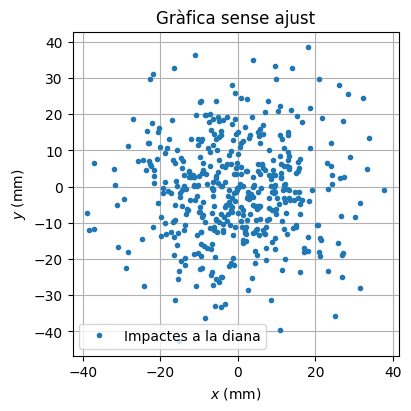

In [ ]:
#llegim les dades d'un arxiu de text (amb tabuladors com a separadors de columnes) i saltant-nos la primera fila
x, y = llegeix_dades("dades0.txt",skip=1)

# I fem la gràfica, hem d'especificar les x i les y
# Podem afegir un titol, una etiqueta per les dades, etiquetes als eixos, i la forma del punt ".", "o" o "s"
# per defecte fa servir "o"
mostra_dades(x, y,
    xlabel=r'$x$ (mm)',     ylabel=r'$y$ (mm)',
    titol='Gràfica sense ajust',
    label_dades='Impactes a la diana',
    forma='.',
    mida_figura=(4,4)
)

## Exemple 1: Ajust lineal amb incerteses

<IPython.core.display.Math object>

<IPython.core.display.Math object>

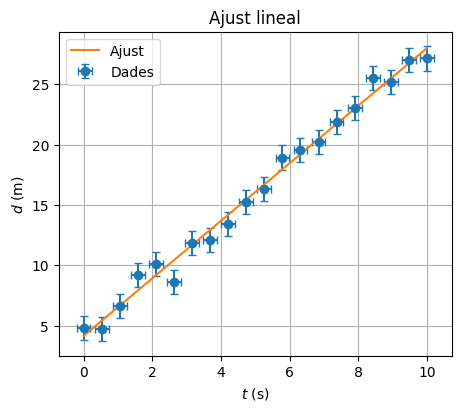

In [ ]:
# per fer un ajust hem d'incloure la opcio funcio_model="model". A part del lineal n'hi ha altres definits
# també hem inclós les incerteses en x (fixades a 0.2 s) i en y (llegides de l'arxiu)
x, y, dy = llegeix_dades("dades1.txt",skip=1)
dx=np.full_like(x, 0.2) # i aquestes son les incerteses de les x's
# Mostrem gràfic i ajust
mostra_dades(x, y, incert_y=dy, incert_x=dx,
             funcio_model=model_lineal,
             titol='Ajust lineal',
             xlabel='$t$ (s)', ylabel='$d$ (m)')


Si només volem fer l'ajust sense representar.

In [ ]:
ajusta_dades(x, y, incert_y=dy,
             funcio_model=model_lineal)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

{'popt': array([2.38627741, 4.13794752]),
 'perrors': array([0.07367884, 0.4309458 ]),
 'chi2_reduced': np.float64(0.6707696174187832),
 'rmse': np.float64(0.7769766120527083),
 'R2': np.float64(0.988620603235255),
 'mask': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True])}

## Exemple 1.1: Ajust lineal en un rang i punts "dolents".

<IPython.core.display.Math object>

<IPython.core.display.Math object>

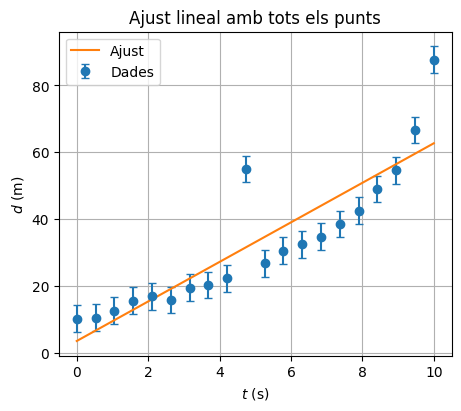

In [ ]:
x, y, dy = llegeix_dades("dades1.1.txt",skip=1)
# Mostrem gràfic i ajust
mostra_dades(x, y, incert_y=dy, funcio_model=model_lineal,
             titol='Ajust lineal amb tots els punts',
             xlabel='$t$ (s)', ylabel='$d$ (m)')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

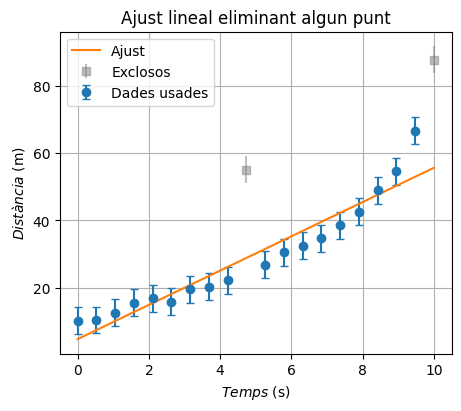

In [ ]:
# Mostrem gràfic i l'ajust excloent algun punt en particular (pot ser una llista)
# exclude=[llista dels punts separats per comes])
mostra_dades(x, y, incert_y=dy, funcio_model=model_lineal,
             log_x=False, log_y=False, titol='Ajust lineal eliminant algun punt',
             xlabel='$Temps$ (s)', ylabel='$Distància$ (m)',exclude=[9,19])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

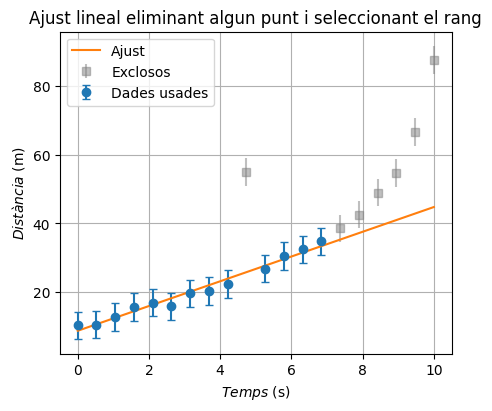

In [ ]:
# Mostrem gràfic i ajust
# podem definir el rang que farem servir per fer l'ajust especificant x_min i/o x_max
mostra_dades(x, y, incert_y=dy, funcio_model=model_lineal,
             titol='Ajust lineal eliminant algun punt i seleccionant el rang',
             xlabel='$Temps$ (s)', ylabel='$Distància$ (m)',
             x_max=7, exclude=[9])

## Exemple 1.2. Mínims quadrats amb mitjanes calculades amb poderació amb les incerteses de les y's

El mètode de minims quadrats **simple** no considera les incerteses de les *y*'s en cap moment en fer l'ajust.

Aquesta funció (*mostra_dades*), en cas que es donin les incerteses de les *y*'s fa el mètode de minims quadrats ponderant la importància de cada punt amb l'invers del quadrat de la seva incertesa. D'aquesta manera els punts amb més incertesa contribueixen menys a l'ajust.

En cas de voler deactivar aquest tipus d'ajust es pot forçar que es fagi servir el mètode de mínims quadrats **simple** especificant la opcio *ponderacio=False* .
En el cas que les incerteses de les *y*'s siguin constants per a tots els punts, els dos mètodes donen els mateixos resultats.

En aquest exemple es poden veure els ajustos emprant els dos mètodes.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

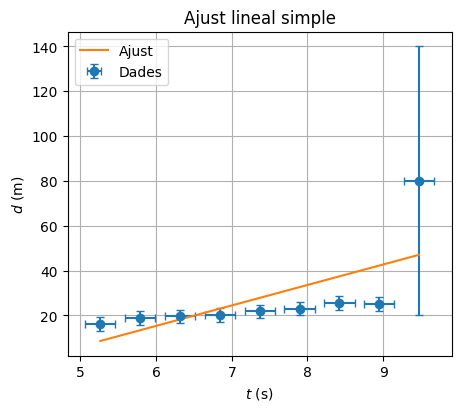

<IPython.core.display.Math object>

<IPython.core.display.Math object>

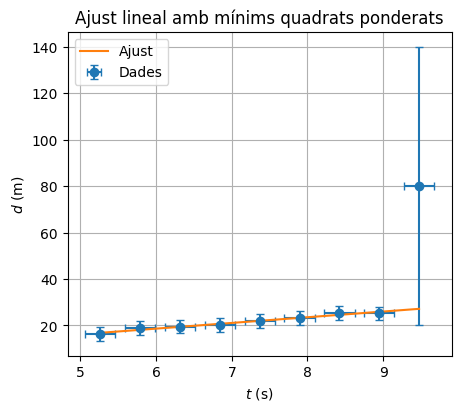

In [ ]:
x, y, dy = llegeix_dades("dades1.txt",skip=1)
x=x[10:19]
y=y[10:19]
dx=np.full_like(x, 0.2) # i aquestes son les incerteses de les x's
dy=np.full_like(x, 3)
y[8]=80
dy[8]=60
# Mostrem gràfic i ajust
mostra_dades(x, y, incert_y=dy, incert_x=dx,
             funcio_model=model_lineal,
             titol='Ajust lineal simple',
             xlabel='$t$ (s)', ylabel='$d$ (m)',ponderacio=False)
# Mostrem gràfic i ajust
mostra_dades(x, y, incert_y=dy, incert_x=dx,
             funcio_model=model_lineal,
             titol='Ajust lineal amb mínims quadrats ponderats',
             xlabel='$t$ (s)', ylabel='$d$ (m)')

## Exemple 2: Ajust exponencial i representació semi-log

<IPython.core.display.Math object>

<IPython.core.display.Math object>

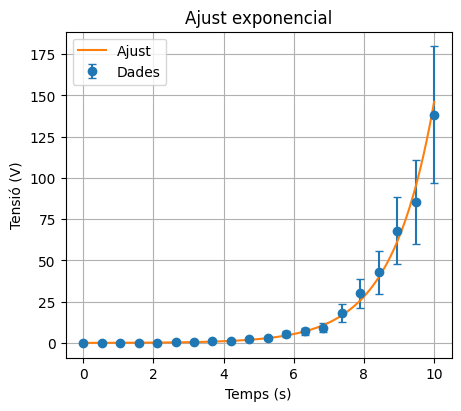

<IPython.core.display.Math object>

<IPython.core.display.Math object>

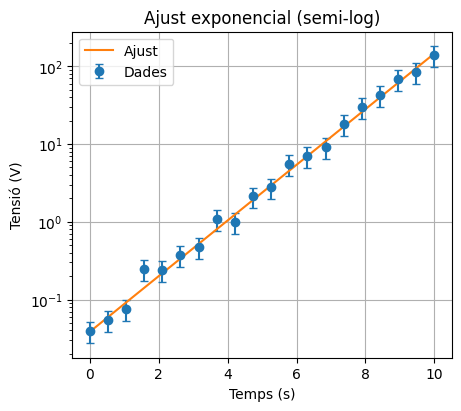

In [ ]:
x, y, dy = llegeix_dades("dades2.txt",skip=1)
# Ajust i gràfica fem un ajust exponencial
mostra_dades(x, y, incert_y=0.3*y, funcio_model=model_exponencial,
             xlabel='Temps (s)', ylabel='Tensió (V)',
             titol='Ajust exponencial')
# Ajust i gràfica fem un ajust exponencial i a part posem un eix en escala logarítmica
mostra_dades(x, y, incert_y=0.3*y, funcio_model=model_exponencial,
             log_y=True, xlabel='Temps (s)', ylabel='Tensió (V)',
             titol='Ajust exponencial (semi-log)')


## Exemple 3: Ajust llei potencial amb representació log-log


<IPython.core.display.Math object>

<IPython.core.display.Math object>

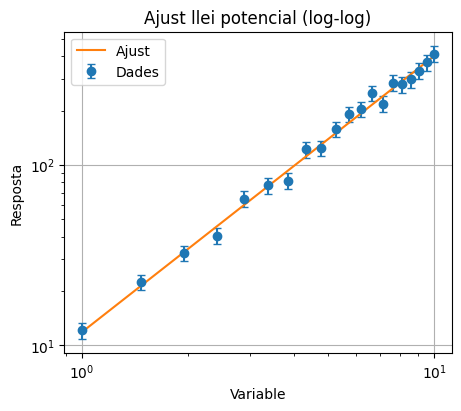

In [ ]:
x, y, dy = llegeix_dades("dades3.txt",skip=1)
mostra_dades(x, y, incert_y=dy, funcio_model=model_potencial,
             log_x=True, log_y=True, xlabel='Variable', ylabel='Resposta',
             titol='Ajust llei potencial (log-log)')


## Exemple 4: Ajust a un polinomi de grau arbitrari (3 en aquest cas)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

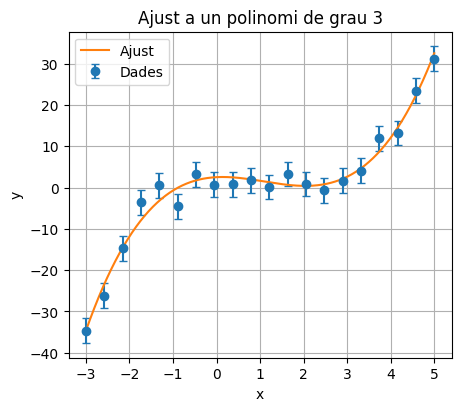

In [ ]:
x, y, dy = llegeix_dades("dades4.txt",skip=1)
# Crida a mostra_dades amb el model polinòmic
mostra_dades(x, y,incert_y=dy,
         funcio_model=model_polinomi,
         titol="Ajust a un polinomi de grau 3",
         xlabel="x",ylabel="y",
         forma='o',
         valors_inicials=np.ones(4) #Grau 3 → 4 coeficients
        )

## Exemple 5: ajust a una funció gaussiana

<IPython.core.display.Math object>

<IPython.core.display.Math object>

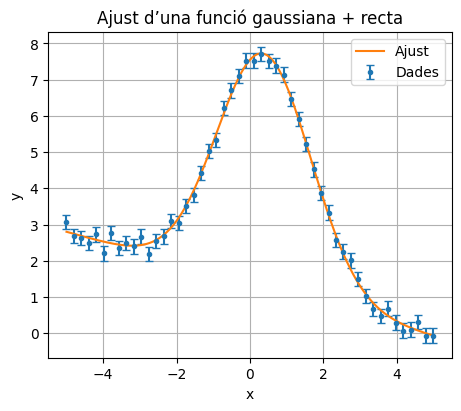

In [ ]:
# Dades simulades
x_dades = np.linspace(-5, 5, 50)
y_dades_sense_soroll = model_gaussià_base(x_dades, 6.5, 0.4, 1.3,-0.3,1.33)
# Afegim soroll i incerteses
np.random.seed(1)
soroll = np.random.normal(0, 0.15, size=x_dades.shape)
y_dades = y_dades_sense_soroll + soroll
incerteses_y = 0.2 * np.ones_like(y_dades)

# Cridem a la funció mostra_dades
mostra_dades(
    x_dades, y_dades,
    funcio_model=model_gaussià_base,
   incert_y=incerteses_y,
    xlabel='x',
    ylabel='y',
    titol='Ajust d’una funció gaussiana + recta',
    forma='.'
)

## Exemple 6: Ajust a una lorentziana

<IPython.core.display.Math object>

<IPython.core.display.Math object>

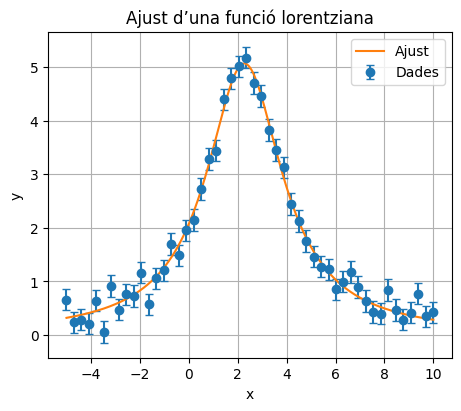

In [ ]:
# Dades simulades
x_dades = np.linspace(-5, 10, 50)
y_dades_sense_soroll = model_lorentziana(x_dades, 5.0, 2.3, 1.95)

# Afegim soroll i incerteses
np.random.seed(1)
soroll = np.random.normal(0, 0.2, size=x_dades.shape)
y_dades = y_dades_sense_soroll + soroll
incerteses_y = 0.2* np.ones_like(y_dades)
mostra_dades(
    x_dades, y_dades,
    funcio_model=model_lorentziana,
    incert_y=incerteses_y,
    xlabel='x', ylabel='y',
    titol='Ajust d’una funció lorentziana'
)

## Exemple 6. Convergència de l'ajust.
En cas de realitzar un ajust no lineal, no està assegurada la convergència del mètode.
Per mirar de corregir aquest fet es poden donar estimacions dels valors dels paràmetres i així facilitar la convergència.
Cal especificar la opció   valors_inicials=[llista ordenada de les estimacions inicials dels paràmetres]

<IPython.core.display.Math object>

<IPython.core.display.Math object>

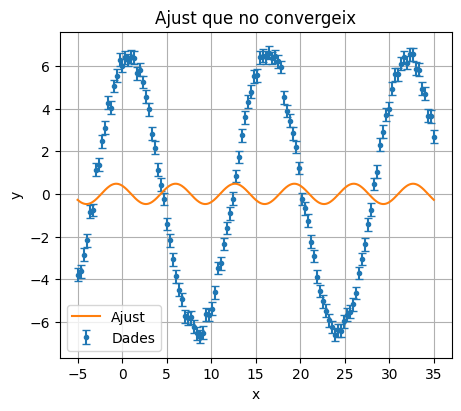

In [ ]:
# Dades simulades
x_dades = np.linspace(-5, 35, 120)
y_dades_sense_soroll = model_sinus(x_dades, 6.5, 0.4, 1.3)
# Afegim soroll i incerteses
np.random.seed(1)
soroll = np.random.normal(0, 0.25, size=x_dades.shape)
y_dades = y_dades_sense_soroll + soroll
incerteses_y = 0.3 * np.ones_like(y_dades)
# Cridem a la funció mostra_dades i veiem que no convergeix l'ajust
mostra_dades(
    x_dades, y_dades, incert_y=incerteses_y,
    funcio_model=model_sinus,
    xlabel='x', ylabel='y',
    forma='.',
    titol='Ajust que no convergeix'
)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

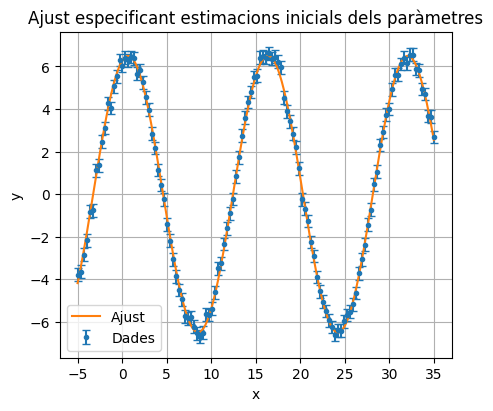

In [ ]:
# Cridem a la funció amb una estimació inicial dels paràmetres d'ajust
mostra_dades(
    x_dades, y_dades,incert_y=incerteses_y,
    funcio_model=model_sinus,
    xlabel='x',ylabel='y',
    titol='Ajust especificant estimacions inicials dels paràmetres',
    forma='.',
    valors_inicials=[6,.5,0]
)

In [ ]:
import sys
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# @title Enter the path to the directory containing functions_labs.py in your Google Drive
# For example: /content/drive/MyDrive/my_python_libs
functions_dir_path = "/content/drive/MyDrive/Colab Notebooks" #@param {type:"string"}

# Add the directory to sys.path
if os.path.isdir(functions_dir_path):
    sys.path.append(functions_dir_path)
    print(f"Added {functions_dir_path} to sys.path")
else:
    print(f"Error: Directory not found at {functions_dir_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Added /content/drive/MyDrive/Colab Notebooks to sys.path


In [1]:
import sys
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
import shutil
import os

# @title Enter the path to the directory containing the data files in your Google Drive
# For example: /content/drive/MyDrive/my_data_files
data_dir_path = "/content/drive/MyDrive/Colab Notebooks" #@param {type:"string"}

# List of data files to copy
data_files = ["dades0.txt", "dades1.txt", "dades1.1.txt", "dades2.txt", "dades3.txt", "dades4.txt", "funcions_labs.py"]

# Destination directory in Colab
destination_dir = "/content/"

# Copy each file
for file_name in data_files:
    source_path = os.path.join(data_dir_path, file_name)
    destination_path = os.path.join(destination_dir, file_name)
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)
        print(f"Copied {file_name} to {destination_dir}")
    else:
        print(f"Warning: {file_name} not found at {source_path}")

Mounted at /content/drive
Copied dades0.txt to /content/
Copied dades1.txt to /content/
Copied dades1.1.txt to /content/
Copied dades2.txt to /content/
Copied dades3.txt to /content/
Copied dades4.txt to /content/
Copied funcions_labs.py to /content/


In [ ]:
import sys
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
import shutil
import os
data_files = ["funcions_labs.py"]

# Destination directory in Colab
destination_dir = "/content/"
data_dir_path = "/content/drive/MyDrive/Colab Notebooks" #@param {type:"string"}
# Copy each file
for file_name in data_files:
    destination_path = os.path.join(data_dir_path, file_name)
    source_path = os.path.join(destination_dir, file_name)
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)
        print(f"Copied {file_name} to {destination_dir}")
    else:
        print(f"Warning: {file_name} not found at {source_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Copied funcions_labs.py to /content/
